In [1]:
import pandas as pd
import numpy as np 
import scipy
from sklearn.feature_extraction.text import TfidfVectorizer
from IPython.display import HTML
import re
import glob
from pandas_profiling import ProfileReport

In [2]:
# grab all the CSV files of interest with a wildcard
csv_file_list = glob.glob("/Users/aoi-rain/Desktop/Data-mining/Data/Kenyapaper*.csv")

# show the result
print(csv_file_list)

['/Users/aoi-rain/Desktop/Data-mining/Data/Kenyapaper3.csv', '/Users/aoi-rain/Desktop/Data-mining/Data/Kenyapaper2.csv', '/Users/aoi-rain/Desktop/Data-mining/Data/Kenyapapers.csv']


In [3]:
# make an empty list
dataframe_list = []

# loop through each filename, read in all the files and add it onto the empty list.
# this returns a list of dataframes
for filename in csv_file_list:
    data = pd.read_csv(filename, sep = "\t")
    dataframe_list.append(data)

# bring the list of dataframes to be one dataframe
#pd.concat(dataframe_list, sort=False)

In [4]:
# load dataframe separated by spaces
authors = pd.read_csv("/Users/aoi-rain/Desktop/Data-mining/Data/Kenyapapers.csv", sep = "\t")

# what are the column names
authors.columns

Index(['title', 'year', 'journal', 'lastname', 'firstname', 'address', 'email',
       'pmid', 'month', 'day'],
      dtype='object')

In [5]:
# convert each item in the column with lastname and firstname
def join_names(x): return str(x["lastname"]) + " " + str(x["firstname"])


# apply function to the dataset
authors["allauthors"] = authors.apply(join_names, axis = 1)

In [6]:
# join the author names together
def join_names(x): return str(x["lastname"]) + " " + str(x["firstname"]) + " " + str(x["address"])

# apply function to the dataset
authors["allauthorsinstitutions"] = authors.apply(join_names, axis = 1)

In [18]:
# set the index to be the title and pmid
author_indexes = authors.set_index(["title", "pmid"])

# take only the columns of interest
author_collab = author_indexes[["allauthors", "allauthorsinstitutions"]]

# see the first columns
HTML(author_collab.to_html())

limit_output extension: Maximum message size of 1000000 exceeded with 16442785 characters

In [9]:
# convert dataframe into a html summary statistics report
profile = ProfileReport(author_collab)

# take the html and save it onto a file
profile.to_file(output_file="output_author+institution.html") # renamed at the moment

In [10]:
# convert the profile object into ipywidgets object
profile.to_widgets() 

In [11]:
profile.to_notebook_iframe()

# Common authors 

Before trying to answers are the authors collaboration within or without. Let see who are most common authors:

Marsh kevin 

Snow Robert W

Bukusi Elizabeth A

English Mike

Berkley James A 

Cohen Craig R

Baeten Jared M

Scott J Anthony G

John-Stewart Grace

Breiman Robert F 

# Common authors + institutions
Gives us a clue which institutions are collaborating and common authors

Moloo S K International Laboratory for Research on Animal Diseases (ILRAD), Nairobi, Kenya 	 	
 
Plummer F A Department of Medical Microbiology, University of Nairobi, Kenya 		
 
Agot Kawango Impact Research and Development Organization, Kisumu, Kenya 	 	
 
Kyobutungi Catherine African Population and Health Research Center, Nairobi, Kenya 		
 
Ndinya-Achola J O Department of Medical Microbiology, University of Nairobi, Kenya 		
 
Grace Delia International Livestock Research Institute, Nairobi, Kenya 		
 
Kariuki Samuel Centre for Microbiology Research, Kenya Medical Research Institute, Nairobi, Kenya 		
 
Scott J Anthony G Kenya Medical Research Institute-Wellcome Trust Research Programme, Kilifi 		
 
Owiti P Academic Model Providing Access to Healthcare (AMPATH), Eldoret, Kenya 	

Morrison W I International Laboratory for Research on Animal Diseases, Nairobi, Kenya 

In [13]:
# subset the dataframe to see who are the collaborators of the most common institutions
# then see if the associated institutions are from outside in the address or inside 
# in code take the name of the user e.g Owiti P filter the all authors to have that name then look at the
# transposed data and look at the authors that collaborated with the person and the column address 

In [30]:
def show_collabs_prob (aut_name):
    '''
    Subsets a dataframe based on the name given and returns a Pandas Series with a probability of seeing that name, institution combination
    
    Args:
    aut_name this is the name of the author which is a string.
    '''
    find_collab = author_collab[author_collab.allauthors == aut_name]
    find_collab = find_collab["allauthorsinstitutions"].value_counts(normalize=True)
    return find_collab

show_collabs_prob("John-Stewart Grace")

John-Stewart Grace Department of Global Health, University of Washington, Seattle, WA, USA                                                                                                                                                                                                                                              0.049505
John-Stewart Grace Department of Global Health, University of Washington, Seattle, Washington, USA                                                                                                                                                                                                                                      0.039604
John-Stewart Grace Department of Pediatrics, University of Nairobi, Nairobi, Kenya                                                                                                                                                                                                                                                    

Author + institution

|Institution| Kenyan institution Count| Foreign institution Count | Comment|
|-----------|--------------------|----------------------|----------|
|Moloo S k | 8| 1| Mostly do research within the institution and post solely, fewer without collaboration|
|Plummer F A| 5|2 |Mostly collaborating within few without collaborators mean|
|Agot Kawango| 2|6 | Mostly collaborating without due to mean don't count institution|
|Kyobutungi Catherine|3| 4| Mostly does research internally compared to within Kenya|
|Ndinya-Achola J O|2|2||Mostly does research internally with other departments in UON
|Grace Delia |2|2|Mostly internal and few external
|Kariuki Samuel|4|1|First collab with JKUAT so far mostly internal
|Morrison W|2|0|Mostly internally few without
|Total|29|18|Number of collaborators

Common author

|Institution| Kenyan institution Count| Foreign institution Count | Comment|
|-----------|--------------------|----------------------|----------|
|Marsh Kevin| 8 |5|Mostly internally with KEMRI related|
|Snow Robert W| 2| 2|Internally with institute
|Bukusi Elizabeth A|5|9| Mostly foreign institutions
|English Mike| 2|1 |Internally with institute
|Berkley James A |1|0|Sample limiting look into it some more
|Cohen Craig R|0 |1|Sample limiting
|Baeten Jared M|1|2|Sample limiting
|Scott J Anthony G|1|1|Sample limiting
|John-Stewart Grace|1|1|Sample limiting
|Breiman Robert F |1|1|Sample limiting
|total| 22| 23|

The trend from the sample that looks into the most common author and institution is that the authors mostly do research and collaborate in departments within the organization/research institute. Fewer external collaborations from the table above. In numbers about 29 institutions in Kenya and about 18 foreign. In addition, JKUAT has the least collaborations with the top institutions from this list expect with KEMRI.

As for the common authors

The trend from the sample that looks into the most common author and institution is that the authors mostly do research and collaborate in departments within the organization/research institute. Fewer external collaborations from the table in Notebooks/Collaboration_trends.ipynb. In numbers about 29 institutions in Kenya and about 18 foreign. In addition, JKUAT has the least collaborations with the top institutions from this list except with KEMRI.

When looking at individual authors the trend is some authors are associated with certain institutions. Also, there are some who mostly collaborate outside additionally like in the previous group mostly internally within the organization/Institutes in different departments. On a side note, they have been only 3 publications related to Machine learning or complex statistical modeling within the time of study explicitly mentioned.

This is an experiment to look into interactions using graph theory. It needs more work.

In [17]:
# subsetting the author
find_collab = author_collab[author_collab.allauthors == "Morrison W I"]

# check out the number on instances the name and institution was mentioned
find_collab = pd.DataFrame(find_collab["allauthorsinstitutions"].value_counts())

In [18]:
# remove the index
find_collab_df = find_collab.reset_index()
find_collab_df

index  allauthorsinstitutions
0   Morrison W I International Laboratory for Rese...                      17
1   Morrison W I International Laboratory for Rese...                       6
2                  Morrison W I ILRAD, Nairobi, Kenya                       3
3   Morrison W I International Laboratory for Rese...                       1
4   Morrison W I International Livestock Research ...                       1
5   Morrison W I International Livestock Research ...                       1
6   Morrison W I International Laboratory for Rese...                       1
7   Morrison W I International Laboratory for Rese...                       1
8   Morrison W I International Laboratory for Rese...                       1
9   Morrison W I International Laboratory for Rese...                       1
10  Morrison W I International Laboratory for Rese...                       1
11  Morrison W I International Livestock Research ...                       1
12  Morrison W I Kenya Agricultural Research Insti...                       1

/Users/aoi-rain/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/aoi-rain/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes
/Users/aoi-rain/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes
/Users/aoi-rain/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be remo

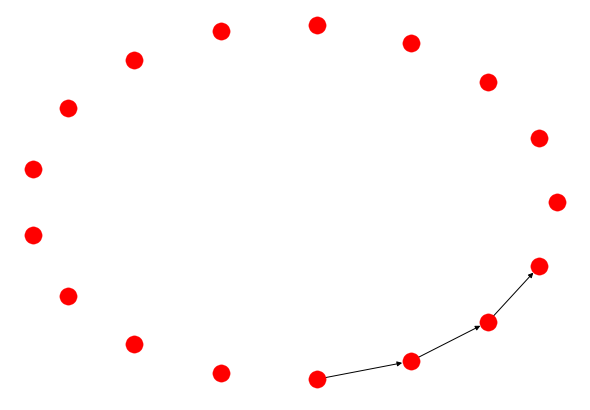

In [22]:
# make a graph to show this relationship
import networkx as nx
import matplotlib.pyplot as plt

# a digraph since the relationship is betweeen the author and institution
G = nx.DiGraph()

# add the nodes from the dataframe: convert into a list beforehand
G.add_nodes_from(find_collab_df["index"].values)

# add the weights to the graph object
G.add_path(find_collab_df["allauthorsinstitutions"].values)

# draw a circular graph with arrows showing relationships
nx.draw_circular(G)

# view graph object
plt.show()

In [18]:
!ls

Collaboration_trends.ipynb            data-import-visualization.ipynb
Data_Analysis_and_Visualization.ipynb output.html
Data_Processing.ipynb                 output_author+institution.html
data-import-NCBI-entrez.ipynb         test2_file.txt
data-import-NCBI.ipynb


In [6]:
!cat test2_file.txt | head -10

Id	ArticleIds	AuthorList	DOI	EPubDate	FullJournalName	HasAbstract	LastAuthor	NlmUniqueID	PubDate	PubTypeList	RecordStatus	Source	Title
31734938	DictElement({'pubmed': ['31734938'], 'medline': [], 'doi': '10.1007/s13555-019-00342-1', 'pii': '10.1007/s13555-019-00342-1', 'rid': '31734938', 'eid': '31734938'}, attributes={})	['Ly K', 'Chang AY', 'Kiprono SK', 'Jose M', 'Smith MP', 'Beck K', 'Sekhon S', 'Muraguri I', 'Mungai M', 'Coates SJ', 'Thibodeaux Q', 'Hulse S', 'Gualberto M', 'Jeon C', 'Nakamura M', 'Bhutani T', 'Maurer T', 'Liao W']	10.1007/s13555-019-00342-1	2019 Nov 16	Dermatology and therapy	1	Liao W	101590450	2019 Nov 16	['Journal Article']	PubMed - as supplied by publisher	Dermatol Ther (Heidelb)	Implementation of an Ultraviolet Phototherapy Service at a National Referral Hospital in Western Kenya: Reflections on Challenges and Lessons Learned.
31734704	DictElement({'pubmed': ['31734704'], 'medline': [], 'pii': '5627697', 'doi': '10.1093/cid/ciz1104', 'rid': '31734704', 'eid':

In [7]:
!pwd

/Users/aoi-rain/Desktop/Data-mining/Notebooks


In [8]:
# import a tab separated file
papers = pd.read_csv("/Users/aoi-rain/Desktop/Data-mining/Data/kenyan_papers_details.txt", sep = "\t")

In [9]:
#profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [10]:
#profile.to_widgets()

In [11]:
# See all the columns in the dataframe 
papers.columns

Index(['Id', 'AuthorList', 'DOI', 'EPubDate', 'FullJournalName', 'HasAbstract',
       'LastAuthor', 'NlmUniqueID', 'PubDate', 'PubTypeList', 'RecordStatus',
       'Source', 'Title'],
      dtype='object')

In [12]:
# See the first 20 items in the column author list
papers.AuthorList[:20]

0                            ['Achieng L', 'Riedel DJ']
1     ['Letizia A', 'Eller MA', 'Polyak C', 'Eller L...
2     ['Lalani T', 'Tisdale MD', 'Liu J', 'Mitra I',...
3     ['Ayieko J', 'Brown L', 'Anthierens S', 'Van R...
4     ['Golicha Q', 'Shetty S', 'Nasiblov O', 'Husse...
5     ['Marshall F', 'Reid REB', 'Goldstein S', 'Sto...
6     ['Ahlberg S', 'Grace D', 'Kiarie G', 'Kirino Y...
7     ['Afulani PA', 'Diamond-Smith N', 'Phillips B'...
8     ['Bitta MA', 'Bakolis I', 'Kariuki SM', 'Nyutu...
9     ['Odero I', "Ondeng'e K", 'Mudhune V', 'Okola ...
10    ['Akombi BJ', 'Ghimire PR', 'Agho KE', 'Renzah...
11    ["O'Brien TG", 'Kinnaird MF', 'Ekwanga S', 'Wi...
12                                                   []
13            ['Muchene KW', 'Mageto IG', 'Cheptum JJ']
14    ['Ogali IN', 'Wamuyu LW', 'Lichoti JK', 'Mungu...
15                 ['Chiyo PI', 'Obanda V', 'Korir DK']
16         ['Barreiro G', 'Mellin-Olsen J', 'Litswa L']
17    ['Kumar N', 'Gupta R', 'Sayed S', 'Moloo Z

In [13]:
# remove any weird characters in the column for author 
remove_quote = papers.AuthorList.str.replace("'", "")
remove_brac = remove_quote.str.replace("[", "")
remove_close = remove_brac.str.replace("]", "")

# convert it to a list for other steps 
author_collab = list(remove_close)

In [14]:
collab = author_collab.__len__()

print (collab)

2269


How this method works: The Term frequency inverse document frequency(Tf-idf) works by finding the 

$$ term frequency/length of document$$ 

It can answer the question what's the probability of observing a piece of text. If the probability is close to one then the term is frequent and the next step could be to look into the author name's institution in the paper they collaborated writing thus finding collaboration trends and inter-institutional collaborations.

In [15]:
# Initialize TFIdf model with min_df set to 1
vectorizer = TfidfVectorizer(min_df=1)

# fit and transform the data
model = vectorizer.fit_transform(remove_close)

# return a numpy matrix with spaces filled with zeros done by the .todense method
# change all our numbers to 2 dp
print(model.todense().round(2))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
# find the mean across each nested array and convert it to a list
weights = np.asarray(model.mean(axis=0)).ravel().tolist()

# Take the output of the Tfidf vectorizer and the weights and turn it into a dataframe
weights_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'weight': weights})

# take the weights_df and sort by weight in descending order and return the first 20 values
weights_df.sort_values(by='weight', ascending=False).head(20)

term    weight
4428        jm  0.008752
4303        ja  0.007905
10565      van  0.007765
2194        de  0.007548
9715        sm  0.007435
380         am  0.007192
2542        ea  0.006304
10827     wang  0.005687
5799        ma  0.005606
2656        em  0.004871
4939    kimani  0.004781
6595        mj  0.004669
5579        li  0.004651
4423        jk  0.004598
11280    zhang  0.004587
8175    otieno  0.004520
6610        mm  0.004507
1917        cm  0.004416
8077   onyango  0.004404
261         ak  0.004381

In [17]:
# see all the output of the rows of the weight df column
HTML(weights_df.sort_values(by='weight', ascending=False).to_html())

In [18]:
# subset list to contain what's in the string
result = filter(lambda x: "Wyckhuys" in x , author_collab)
print(list(result))

['Karp DS, Chaplin-Kramer R, Meehan TD, Martin EA, DeClerck F, Grab H, Gratton C, Hunt L, Larsen AE, Martínez-Salinas A, "ORourke ME", Rusch A, Poveda K, Jonsson M, Rosenheim JA, Schellhorn NA, Tscharntke T, Wratten SD, Zhang W, Iverson AL, Adler LS, Albrecht M, Alignier A, Angelella GM, Zubair Anjum M, Avelino J, Batáry P, Baveco JM, Bianchi FJJA, Birkhofer K, Bohnenblust EW, Bommarco R, Brewer MJ, Caballero-López B, Carrière Y, Carvalheiro LG, Cayuela L, Centrella M, Ćetković A, Henri DC, Chabert A, Costamagna AC, De la Mora A, de Kraker J, Desneux N, Diehl E, Diekötter T, Dormann CF, Eckberg JO, Entling MH, Fiedler D, Franck P, Frank van Veen FJ, Frank T, Gagic V, Garratt MPD, Getachew A, Gonthier DJ, Goodell PB, Graziosi I, Groves RL, Gurr GM, Hajian-Forooshani Z, Heimpel GE, Herrmann JD, Huseth AS, Inclán DJ, Ingrao AJ, Iv P, Jacot K, Johnson GA, Jones L, Kaiser M, Kaser JM, Keasar T, Kim TN, Kishinevsky M, Landis DA, Lavandero B, Lavigne C, Le Ralec A, Lemessa D, Letourneau DK, L

In [19]:
# confirmation of the word
# aim is to get to index 9162 sa 0.003904
author_collab

['Achieng L, Riedel DJ',
 'Letizia A, Eller MA, Polyak C, Eller LA, Creegan M, Dawson P, Bryant C, Dohoon K, Crowell TA, Lombardi K, Rono E, Robb ML, Michael NL, Maswai J, Ake JA',
 'Lalani T, Tisdale MD, Liu J, Mitra I, Philip C, Odundo E, Reyes F, Simons MP, Fraser JA, Hutley E, Connor P, Swierczewski BE, Houpt E, Tribble DR, Riddle MS',
 'Ayieko J, Brown L, Anthierens S, Van Rie A, Getahun M, Charlebois ED, Petersen ML, Clark TD, Kamya MR, Cohen CR, Bukusi EA, Havlir DV, Camlin CS',
 'Golicha Q, Shetty S, Nasiblov O, Hussein A, Wainaina E, Obonyo M, Macharia D, Musyoka RN, Abdille H, Ope M, Joseph R, Kabugi W, Kiogora J, Said M, Boru W, Galgalo T, Lowther SA, Juma B, Mugoh R, Wamola N, Onyango C, Gura Z, Widdowson MA, DeCock KM, Burton JW',
 'Marshall F, Reid REB, Goldstein S, Storozum M, Wreschnig A, Hu L, Kiura P, Shahack-Gross R, Ambrose SH',
 'Ahlberg S, Grace D, Kiarie G, Kirino Y, Lindahl J',
 'Afulani PA, Diamond-Smith N, Phillips B, Singhal S, Sudhinaraset M',
 'Bitta MA, Ba

# Common or collaborative authors
Jm: Castellote JM

Ja: Rajasekaran S, Hajjaj-Hassouni N, Berkley JA, Scott JAG, Mott JA, Otieno JA

van: Van der Horst, Vanlauwe B, van Baar A, van der Straten A

de: Haldeman S, [Mogunde J & Burmen BK], Deino AL

sm: Mesman J, Behrensmeyer AK

am: Noor AM, Wambua J

ea: Griffith EA, Bukusi EA, Shearer H, Okiro EA

wang: Wang Q, Wang K, Wang X, Wang Y

ma: Macharia A, Ouma PO, Ouma GS

em: Partners Demonstration Project Team., Muchemi SK, Temmerman M

Kimani: Kimani F, Kimani J, Kimani S

MJ: Newport MJ,Burton MJ

LI: REALITY Trial Team .

JK: Kibet JK, Kungu JK

Zhang: Zhang Y, Zhang Z

Otieno: Otieno G, Otieno W, Otieno F, Otieno FO

MM: Islam MM, Win MM, Levine MM

CM: Williams PCM

Onyango: Onyango MA, Onyango C

AK: Githeko AK, Kakooza-Mwesige A

AA: Yusuf AA, Kim AA

Bukusi: Bukusi E

MC: Lee MC, Were MC

LM: Cranmer LM

Chen: Chen Y

SK: Kopansky-Giles D

DM: Gibb DM

RW: Snow RW, Sauerwein RW

SA: None

We found that looking at the first name and initials allowed us to see trends in author collaboration. TFIDF vectorizer did an exceptional job by finding which names/initials have a high probability of appearing together. We chose the first 20 and indeed the algorithm revealed the authors after using a filter operation on the author list. Moreover, the bottom 5 were rare authors since they only appeared once. We also extended the search to include the letters that appear in the author name; Thanks to the Ctrl + F with the icon highlight all in Mozilla 75.0 (64 bit). 